## Session 3

This is the notebook for the third session of the Spring 2020 [P-ai](http://www.p-ai.org) workshops.
It covers regression, classification, and some neural networks.

This is adapted from [Aashita Kesharwani's workshop series at Harvey Mudd.](http://www.aashitak.com/ML-Workshops/)

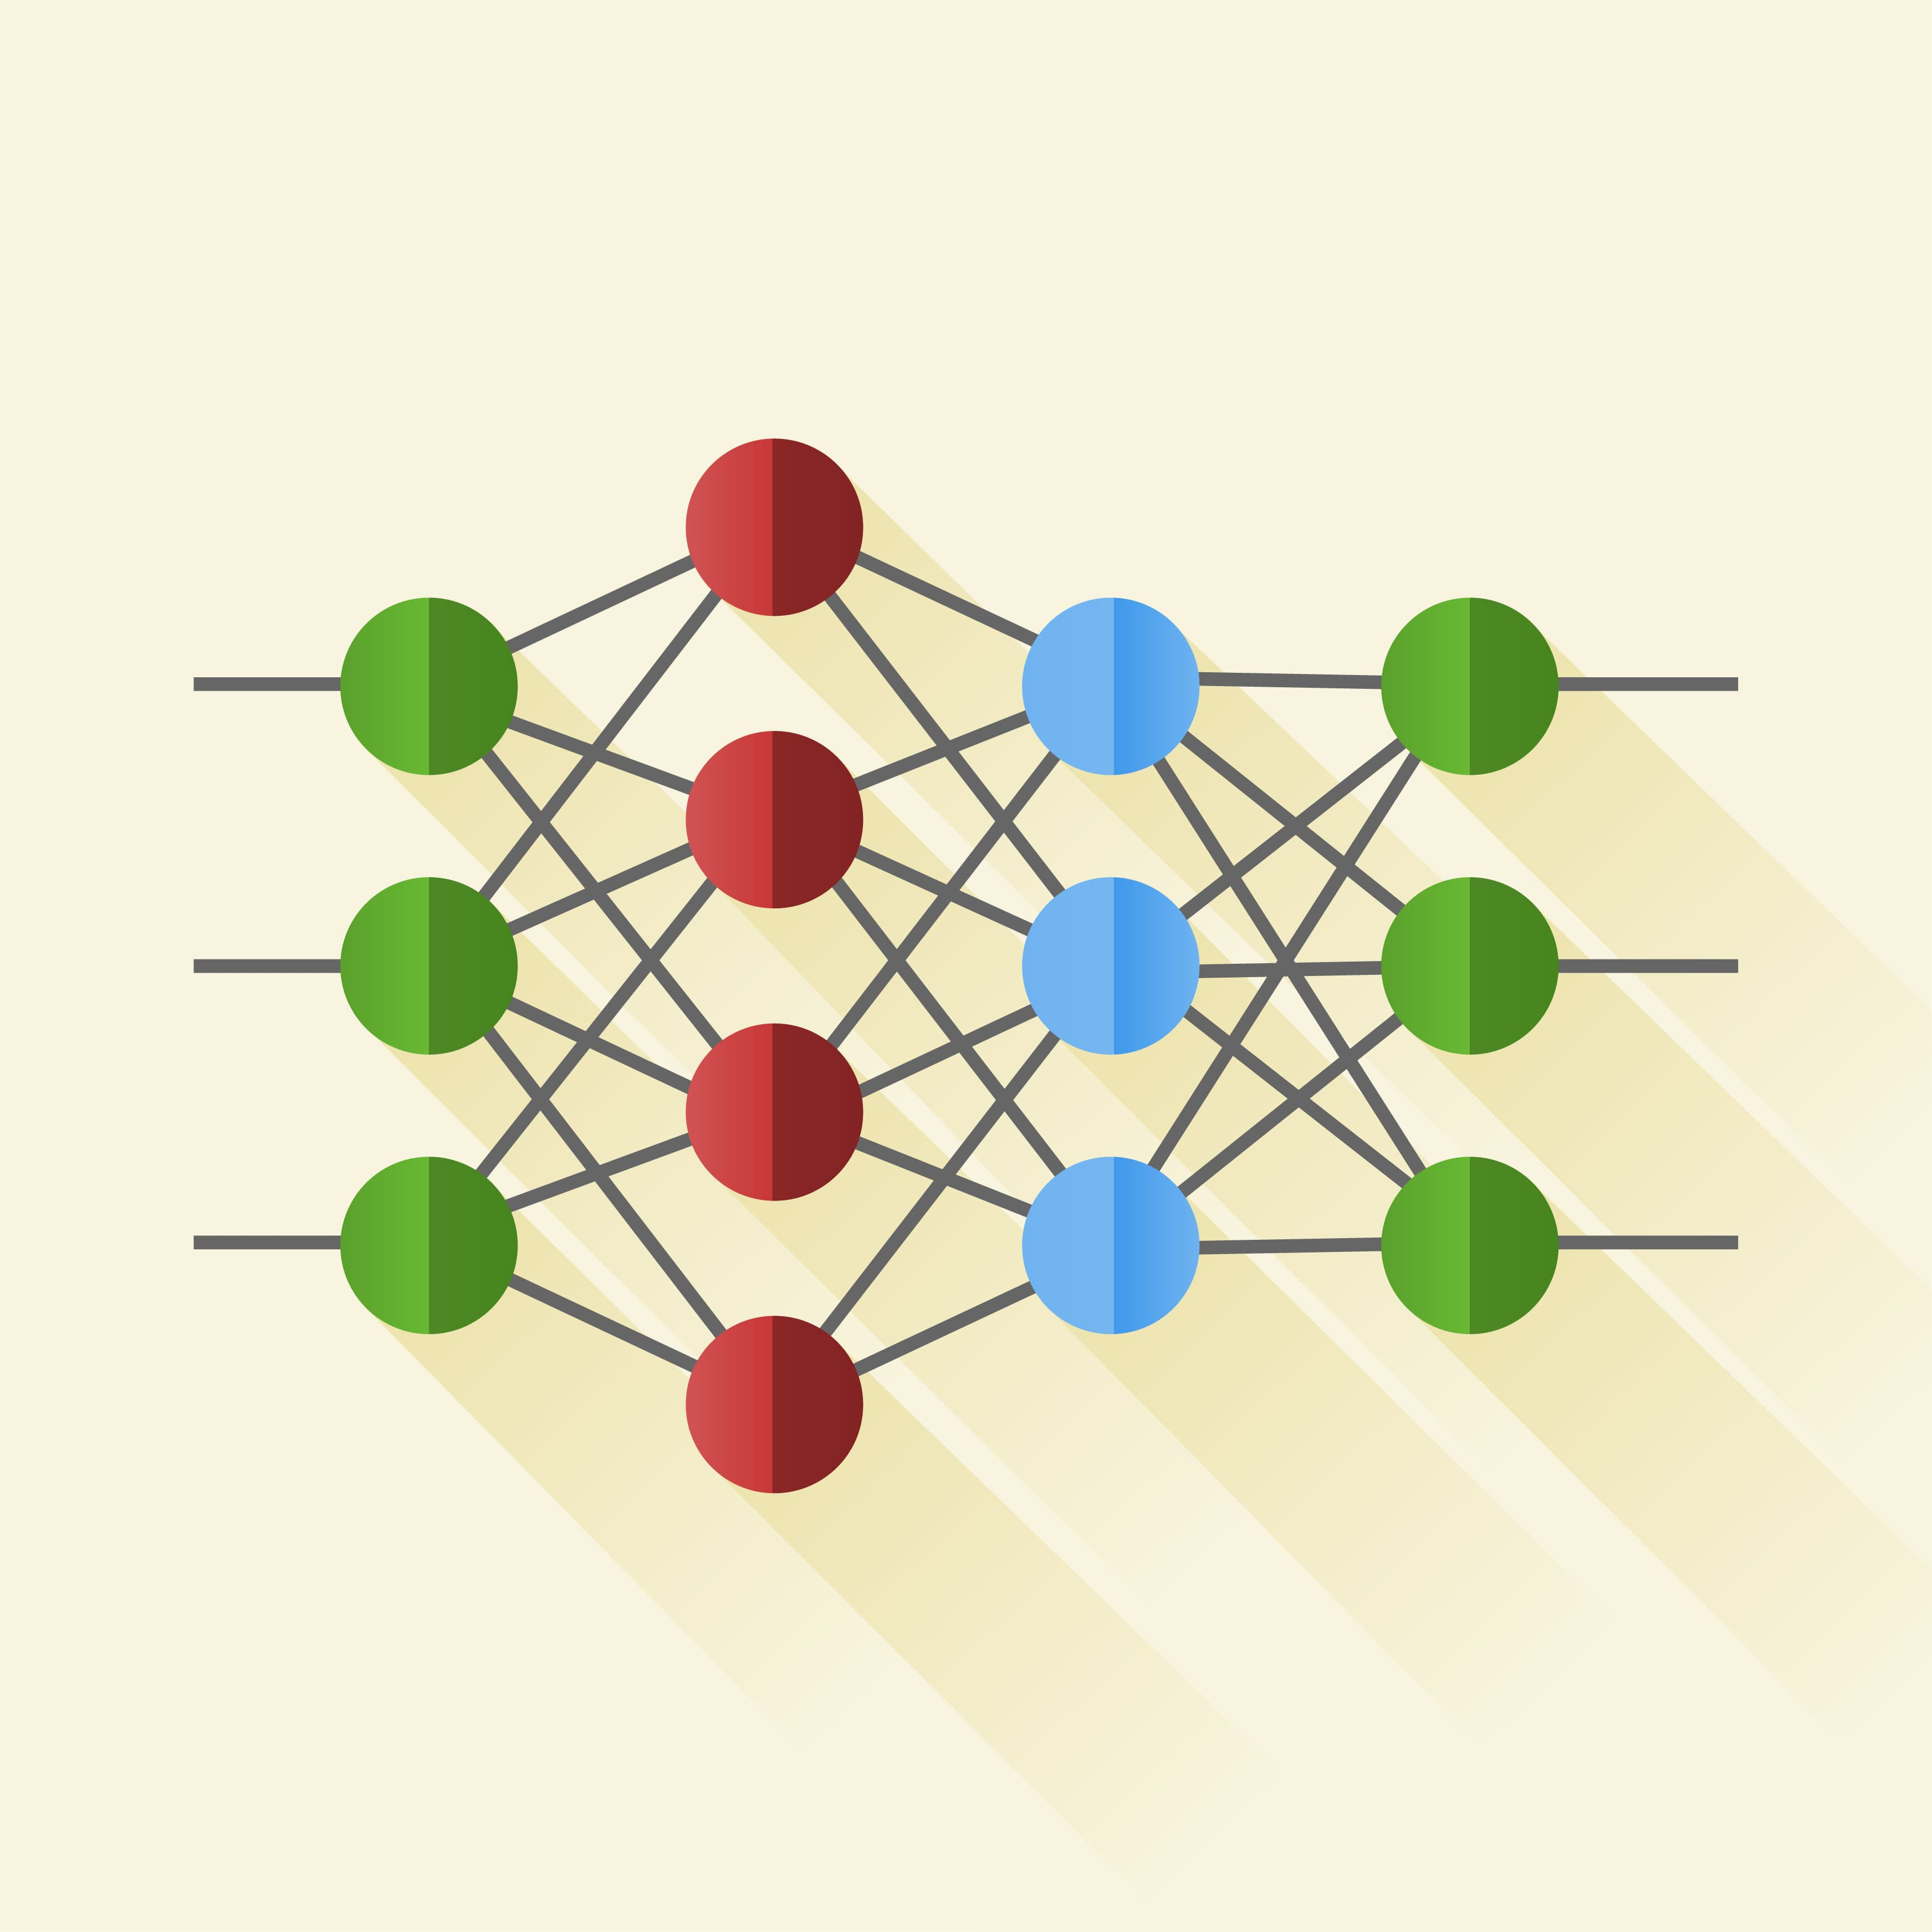


## Topics
- Linear Regression
- Ways to avoid overfitting
- Logistic Regression
- Decision Trees
- k-Nearest Neighbours
- Support Vector Machines
- Random Forest ensemble
- Voting Classifiers
- Feedforward Neural Networks

## Part 1: Linear Regression
- Determining the impact of response variables on the target variable. 
- Fitting a curve using training data to estimate target variable for unseen data

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" height="350" />
<p style="text-align: center;"> Regression curve </p> 

Let's look at an example of linear regression using the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html). First we import python modules and the dataset:

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

The dataset has many features (or variables), but we will pick only the BMI so as to be able to plot and visualize the relationship between input and target variables.

In [ ]:
X = df['bmi'].values
Y = diabetes.target

plt.scatter(X, Y);
plt.xlabel('Body mass index (BMI)');
plt.ylabel('Disease progression');

We're trying to find the optimal value for the slope and intercept for the line and we are learning from the training examples. Our objective is to minimize the difference between the actual $y$ value and the value predicted using the line. 

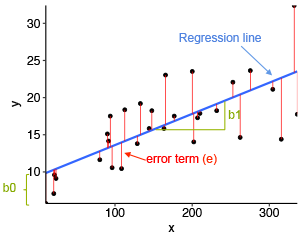

In [ ]:
# Weight (slope)
w = 10000
# Bias (y-intercept)
b = 10
import random
random.seed(0)
# This gets 10 random Xs and Ys
idx = random.sample(range(len(df)), 10)
x, y = X[idx], Y[idx]
# Predict value given regression line
y_pred = w*x + b
# Calculate error
error = y - y_pred
pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred, 
              'error': error})

The simple linear regression (linear regression with one variable) is formulated as $ y_{pred} = w * x + b $.

To find the optimal values for $w$ and $b$, we need to quantify the cost function (also known as the error function or the loss function) that we can minimize. 

* How do we formulate it?
* Should we sum up the errors? If not, why?

The simple linear regression model uses the mean-squared error (MSE) as the cost function. We square the errors and then take their average.

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})^2 $$

The [gradient descent algorithm](https://machinelearningmastery.com/gradient-descent-for-machine-learning/) is used to update the weights iteratively in the direction of the steepest descent of the cost function. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.

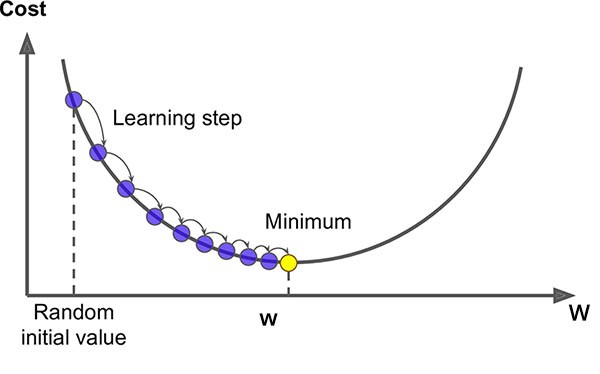

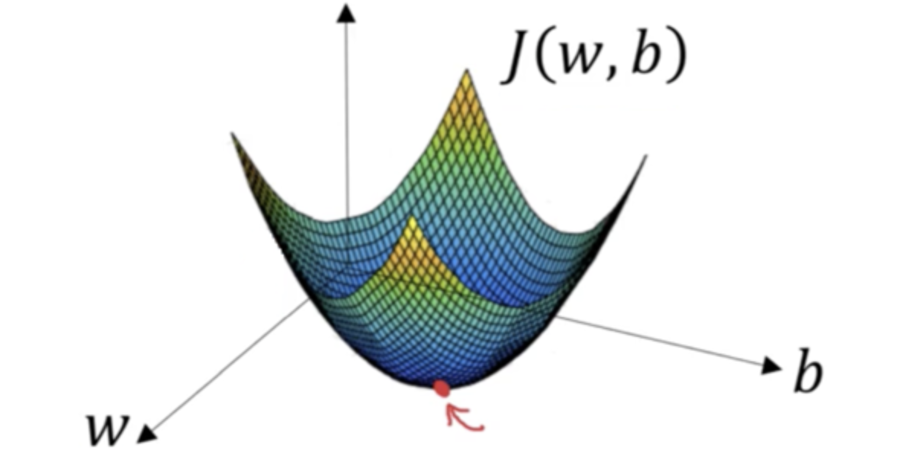



To derive the formula for updating weights using gradient descent, we first substitute $ y_{pred}^{(i)} = w * x^{(i)}+b $ in $J$ to get

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - (w * x^{(i)}+b))^2 $$

Then we take the partial derivative, 
$$ \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Thus, we get
$$ w := w - \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Similarly,
$$ b := b - \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   $$

To summarize, we defined a cost function to quantify the error in predicting outputs and then we update the weights so as to minimize the cost in the fastest way with the help of gradient descent algorithm.

The same formulation and understanding can be extended to linear regression with more than one variable, say $x_1, x_2, \dots, x_n$ with the equation $ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$. And we estimate the weights $w_1, w_2, \dots, w_n$ corresponding to each variable as well as the intercept.

Scikit-learn has an implementation of the linear regression as demonstrated below. First we import the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and then initialize the regressor.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Then we train the regressor using the `fit()` method on the smaller set of 10 data points.

In [ ]:
x = x.reshape(-1, 1)
lin_reg.fit(x, y)

In [ ]:
w = lin_reg.coef_[0]
b = lin_reg.intercept_
w, b

In [ ]:
def plot_line(w, b):
    x_values = np.linspace(X.min(), X.max(), 100)
    y_values = w*x_values + b
    plt.plot(x_values, y_values, 'r-')

plt.scatter(x, y);
plot_line(w, b);

Next, we train the regressor on the entire dataset and fit a line.

In [ ]:
X = X.reshape(-1, 1)
lin_reg.fit(X, Y)
w = lin_reg.coef_[0]
b = lin_reg.intercept_
plt.scatter(X, Y);
plot_line(w, b);

The feature BMI does not seem to possess a linear relationship with the disease progression. The coefficient of determination (denoted by $R^2$) is a statistical measure of how close the data are to the fitted regression line and it can be calculated using `score()` method.

In [ ]:
lin_reg.score(X, Y)

So, the R-sqaured is around 34%, which is somewhat low.

$R^2$ is one of the metric for evaluating regression models. An $R^2$ value of 1 would represent a perfectly linear relationship, and an $R^2$ value of 0 means there is no linear relationship (shown below).

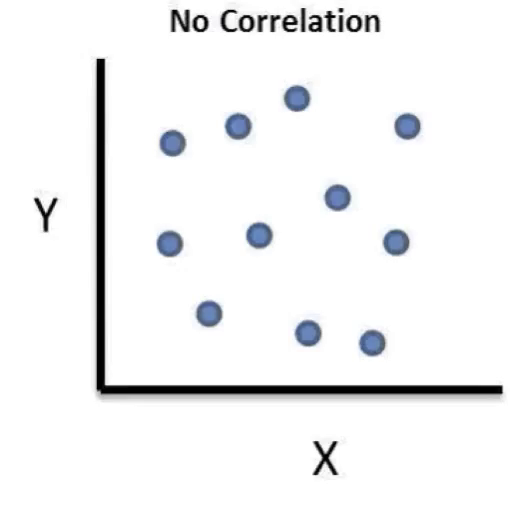

## Classification: 
- Predicting a label to classify the data points.
- Finding a decision boundary using a labeled training dataset to determine labels for unseen data.

An example of binary classification algorithm: Logistic regression - separates the classes using a linear boundary 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>

Three classifiers A, B and C are trained on a given labeled dataset. The accuracy of the trained classifiers in predicting the labels correctly on the same dataset is as follows.

|Models | Accuracy| 
|---|---|
| Model A | 90%|
| Model B | 80%|
| Model C | 70%|

Clearly, model A is better at predicting labels for the training data than model B and C. Do you think model A will do a better job in predicting labels for yet unseen data as well?

To answer this question, let us first briefly overview the learning process for logistic classifiers.

It will be helpful to build our understanding of the learning process based on either the logistic classifier or the linear regression. When the neural networks are pared-down to a single layer with the commonly used logistic sigmoid function as the activation function, then what we get is a logistic classifier. These algorithms, that is logistic/linear regression and simple neural networks, are called parametric machine learning algorithms. In the context of parameteric algorithms, let us think about the following questions related to the learning process. 

#### What does the machine learn?

Answer: Model parameters (or weights) specific for each classification/regression algorithm.

#### How does the machine learn the parameters (or weights)?

Model parameters (or weights) are updated to keep on ***minimizing the cost function*** iteratively using the training data. The cost has distinctive mathematical formulations for various algorithms but the gist of the learning process is the same.


#### Cost function  
* For regression: Measures the difference between the predicted output and the true output in the ***training dataset***. 
* For classification: Measures the error in classifying examples in the ***training dataset***. 

***When to stop the iterative learning process? Until the cost function has reached its minimum value?*** 

To answer the question, let us consider this binary classification problem with two variables (features). 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg" width="250" height="250" />

* Which of the two decision boundaries (black or green) will have a lower value for the cost function?
* Which decision boundary would you prefer for classifying the unseen examples?

Since the cost function is calculated solely based on the training dataset, minimizing it too much might mean that the model does not generalize well to unseen examples. This is called overfitting. 

***Over-fitting and under-fitting to the training set***  
The models can over-train on a dataset, that is they learn the dataset so well that they do not generalize well to the examples outside of that dataset. 

If we try to fit too complex of a curve as the decision boundary separating the classes and we don't have enough training examples to estimate the parameters for the curve, then we suffer from over-fitting.

On the other hand, if we try separating the classes with an over-simplified curve as the decision boundary and we have enough training examples to estimate a curve that would be a better fit, then we suffer from under-fitting. 

<img src="https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg" width="800" height="300" />

How do we know whether our model is overfitting or underfitting to the training set?

Answer: At the beginning, we save some examples as the validation set and use it to test the performance of the model. 

|Models | Accuracy on the training set | Accuracy on the validation set | 
|---|---|---|
| Model A | 90%| 70% |
| Model B | 80%| 75% |
| Model C | 70%| 65% |

* With this additional information, can you guess which model will likely perform better for the unseen data?
* Which of these three models would you suspect for overfitting to the training data?
* Which of these three models would you suspect for underfitting to the training data?

The problem for over-fitting and under-fitting and the underlying reasons of model complexity is the same for regression as well.

<img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png" width="600" height="200" />

#### Key take-aways so far:
- Always save some examples from the datasets for testing model performance.
- Pay attention to the model performance on the validation set rather than solely on the training set.
- Watch out for both under-fitting and over-fitting.



#### How to address overfitting?
- Reduce the number of features 
    - Discard some features
    - Dimensionality reduction techniques such PCA, LDA, etc.
- Simplify the model (by tuning hyperparameters)
- Early termination (reducing the number of iterations for training)
- Regularization, if applicable
- Add more training examples, if possible  
<img src="https://i.stack.imgur.com/rpqa6.jpg" width="450" height="400" />

In a nutshell, to reduce overfitting, reduce complexity.
To reduce underfitting, enhance complexity.



## Part 2: Types of Classifiers


As we learned in the previous session, the equation for simple linear regression is 

$$y_{pred} = w*x+b $$

Similarly, the linear regression for more than one features, say $x_1, x_2, \dots, x_n$ is given by

$$y_{pred} = w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$$

The learning process for this model involves learning the weights (or parameters) $w_1, w_2, \dots, w_n$ and $b$ by minimizing the cost function defined by mean-squared error. The weights are iteratively updated using the gradient descent algorithm to minimize the cost function in the fastest way.

#### Logistic Regression:
Fits a linear decision boundary to separate the classes. 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="250" />
<p style="text-align: center;"> Logistic Regression classifier </p>

For binary classification, we assign the two classes the labels 0 and 1. The class labeled 1 is also called the positive class. The classifier predicts the probability ($p$) that an observation belongs to the positive class. The probability for the class labeled $0$ (or the negative class) would be $1-p$.

To build a linear classifier is same as finding a function for probability that gives a value close to 1 for points in the upper region (or the points in the positive class) and a value close to 0 for points in the lower region (or the points in the negative class). 

In the context of neural networks, such a function is called an activation function. They are said to be fired or not depending on whether $f \to 1$ or $f \to 0$ given some input for each node or neuron. This activation function is the sigmoid, among the more popular one like RELU.

$$sig(t) = \frac{1}{1+e^{-t}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

Our main objective for a classification task is to find the optimal decision boundary to separate the classes. For the logistic regression, the boundary is linear. For the case of two features, this linear boundary is simply a line in 2-dimensional plane, whereas for three features, the linear boundary would be a linear plane separating the two classes in 3-dimensional plane and in general, a $n-1$ dimensional linear hyperplane in a $n$-dimensional space.

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="250" />
<p style="text-align: center;"> Logistic Regression classifier </p>

To be able to visualize and understand intuitively, we will first crack the formulation of logistic classifier, also known by its misnomer logistic regression, in the case of two features, say $x_1$ and $x_2$, as seen in the figure above.

Math question: We represent the following line using the equation $x_1-x_2-1=0$. How do we mathematically represent the two regions that are separated by this line?

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig1.png?raw=true)

The region containing the origin is given by $x_1-x_2-1<0$ whereas the other one by $x_1-x_2-1>0$.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig2.png?raw=true)

As seen above, the points in one region is characterized by $w_1*x_1 + w_2*x_2+b<0$ and the other region by $w_1*x_1 + w_2*x_2+b>0$. We combine this with the logistic (sigmoid) function above to get the equation for logistic regression:

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function defined above. 

Observations:
* The output of the sigmoid lies between 0 and 1, which corresponds to the probability in our case. 
* The logistic function (and hence the probability) approximates to 1 for the large positive values, whereas it converges to 0 for large negative values. 
* The value for $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ is positive for points in the region on one side of the line and negative for the other. The magnitude of the values (positive or negative) is higher for points far away from the line.
* In view of the above equation for logistic regression and the properties of sigmoid logistic function, the points farther away from the line will be classified with a high probability to one class or the other, whereas the probability will be closer to 0 for points close to the line.
 
In general, we set the threshold for probability to be 0.5. This means that whenever $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b \geq 0$, it is classified to the positive class, whereas whenever $w_1*x_1 + \cdots + w_n*x_n + b < 0$, it is classified to the negative class. The points for which the value for $w_1*x_1 + \cdots + w_n*x_n + b$ is not large in magnitude have probabilities that are closer to 0.5. Such points needs to be classified with extra care, as we will see later on in evaluation metrics. 

The weights $w_1, w_2, \dots, w_n$ and $b$ are learned by minimizing the cost function, as seen in the previous session. The cost function used is called the cross-entropy log loss and is defined below.

For points with label $y=1$, the cost is

$$ c(y, p) = - \log(p) \ \ \ \ \ \ \ \ \ \text{ if }\ \  y = 1$$

whereas for points with label $y=0$, the cost is

$$ c(y, p) = - \log(1-p) \ \  \text{ if }\ \  y = 0$$

The cost function takes the average over the costs for all points. The costs for the two classes $y=0$ and $y=1$ can be summed up in the following formula.

$$ J = \frac{1}{N} \sum_{i=1}^N c(y, p) = - \frac{1}{N} \sum_{i=1}^N y \log(p) + (1-y) \log(1-p)$$

where $p=Prob(y=1)$.

The updates to the weights are made in a similar fashion as seen earlier for linear regression by minimizing the cost function using gradient descent algorithm.

<img src="https://uniformlyuninformative.files.wordpress.com/2014/05/lecture6-logistic-regression_slide19.png" />

First we import python modules:

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

We will first generate a dataset suitable for demonstration and applying classification algorithms using built-in function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in scikit-learn.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)

The binary classification dataset containing two features (or variables) is plotted below. 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k');

Let us split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

We create a logistic classifier using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()

Next we train the classifier using the training data:

In [ ]:
LR_clf.fit(X_train, y_train)

Now, we test the accuracy of the classifier on both training and testing dataset.

In [ ]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

We define the function to plot the decision boundaries of the classifier:

In [ ]:
def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');

In [ ]:
plot_decision_boundary(LR_clf, X, y)

The above binary classification dataset was clearly separable by linear boundary, but that is not the case often. Next, we generate another dataset that is not linearly separable.

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, random_state=0)

We build a logistic regression model on this dataset.

In [ ]:
LR_clf2 = LogisticRegression().fit(X1_train, y1_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf2.score(X1_train, y1_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf2.score(X1_valid, y1_valid)))

plot_decision_boundary(LR_clf2, X1_train, y1_train)

Logistic regression is perhaps not a good choice for this kind dataset. We first test this dataset with other classification algorithms, namely:
- Decision Trees
- k-Nearest Neighbors
- Support Vector Machines (SVM)
- Random Forests

These algorithms are briefly introduced here first and we will revisit to learn more about them in the exercise session.

[Decision Tree classifier](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052):

- Tree-like model of decisions
- Also known as CART algorithm
- Decision making is explicit and can be visualized
- Sensitive to the training data used. Slight changes in the training can lead to vastly different trees. This is one of the reasons we prefer Random Forest ensemble given below.
- Can create over-complex trees that over-fit to the training data

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" width="300" height="350" />
<p style="text-align: center;"> Decision Tree classifier for Titanic dataset </p>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier().fit(X1_train, y1_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT_clf.score(X1_train, y1_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(DT_clf, X1, y1)

k-Nearest Neighbors classifier:
- Uses k-nearest neighbors from the training data to predict the label 
- Unsupervised learning

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif)

The default value for k is 5 in scikit-learn implementation.
4 Steps:
1. Randomly initialize k clusters centroids
2. For each training example, assign prediction to its closest cluster centroid.
3. For each cluster, set position of cluster centroid to average(mean) of points assigned to that cluster.
4. Iterate 2, 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier().fit(X1_train, y1_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_clf.score(X1_train, y1_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(knn_clf, X1, y1)

Support Vector Machines (SVM):
- An extension of linear classification
- Separates the classes by choosing a hyperplane that maximizes the distance to the nearest data point on either side and hence known as maximum margin classifier.
- The data points that are closest to the decision boundary on either side are called support vectors.
- It minimize the classification error and at the same time maximizes the geometric margin 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="350" height="350" />
<p style="text-align: center;"> Support Vector Machines (SVM) classifier </p>


Using the kernel trick to transform the feature space, SVM can learn non-linear decision boundaries. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png" width="350" height="350" />
<p style="text-align: center;"> Using Kernel trick for Support Vector Machines (SVM) classifier </p>

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X1_train, y1_train)

print('Accuracy of Support Vector classifier on training set: {:.2f}'
     .format(svc_clf.score(X1_train, y1_train)))
print('Accuracy of Support Vector classifier on test set: {:.2f}'
     .format(svc_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(svc_clf, X1, y1)

[Random Forest ensemble](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/): 
- Ensemble of decision tree classifiers which means it combines predictions from multiple decision tree classifiers to give a more accurate prediction than any individual tree.
- As noted earlier, decision trees are unstable, that is they are sensitive to the changes in training data. For the ensemble, we take bootstrap samples from the training data and built trees on it.
- Prone to over-fitting, though less prone than individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=0).fit(X1_train, y1_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(RF_clf.score(X1_train, y1_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(RF_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(RF_clf, X1, y1)

Smoother boundary usually suggests that it is less likely to be subjected to the noise and fluctations in training set and hence, less likely to over-fit. 

For this dataset:
* The support vector classifier with minimal difference between training and testing set accuracy and smoother decision boundary seems to have performed the best
* The decision tree algorithm seems to have suffered the most from over-fitting. 
* The logistic regression classifier seems to be under-fitting on account of being a poor fit for the problem.

The promise of neural networks is that they can learn almost any kind of decision boundary if we build our network deep enough with suitable architecture and train it long enough with sufficiently big dataset. All other methods have limitations in how complex of a boundary they can learn. However, unless we have an abundance of training examples and the computational power, simpler methods are a good answer to many problems in industry even today. 

# Part 3: Using Classifiers

First we import python modules:

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.simplefilter('ignore')

In today's exercise, we will work with the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic). The objective of this Kaggle competition is to predict whether a passenger survives or not given a number of features related to passengers' information such as gender, age, ticket class, etc. We are going to build a few classification models to predict whether a passenger survives. The `train.csv` file contains features along with the information about the survival of the passenger, so we will use it to train and validate our models. The `test.csv` file contains only features and we will use one of our trained models to predict the survival for these passengers and [submit our predictions to the competitions leaderboard](https://www.kaggle.com/c/titanic/submit).

For your convenience, the data preprocessing and feature engineering that we did in the previous sessions is summarized below.

In [ ]:
path = ''
df = pd.read_csv(path + 'train.csv')
train = pd.read_csv(path + 'train.csv')
target = train.Survived.astype('category')
train.drop('Survived', axis=1)

test = pd.read_csv(path + 'test.csv')
PassengerId = test.PassengerId

def get_Titles(df):
    df.Name = df.Name.apply(lambda name: re.findall("\s\S+[.]\s", name)[0].strip())
    df = df.rename(columns = {'Name': 'Title'})
    df.Title.replace({'Ms.': 'Miss.', 'Mlle.': 'Miss.', 'Dr.': 'Rare', 'Mme.': 'Mr.', 'Major.': 'Rare', 'Lady.': 'Rare', 'Sir.': 'Rare', 'Col.': 'Rare', 'Capt.': 'Rare', 'Countess.': 'Rare', 'Jonkheer.': 'Rare', 'Dona.': 'Rare', 'Don.': 'Rare', 'Rev.': 'Rare'}, inplace=True)
    return df

def fill_Age(df):
    df.Age = df.Age.fillna(df.groupby("Title").Age.transform("median"))
    return df

def get_Group_size(df):
    Ticket_counts = df.Ticket.value_counts()
    df['Ticket_counts'] = df.Ticket.apply(lambda x: Ticket_counts[x])
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    df['Group_size'] = df[['Family_size', 'Ticket_counts']].max(axis=1)
    return df

def process_features(df):
    df.Sex = df.Sex.astype('category').cat.codes
    features_to_keep = ['Age', 'Fare', 'Group_size', 'Pclass', 'Sex']
    df = df[features_to_keep]
    return df

def process_data(df):
    df = df.copy()
    df = get_Titles(df)
    df = fill_Age(df)
    df = get_Group_size(df)
    df = process_features(df)
    medianFare = df['Fare'].median()
    df['Fare'] = df['Fare'].fillna(medianFare)
    return df

X_train, X_test = process_data(train), process_data(test)

Please feel free to refer to the classification algorithms notebook for the code below.

First, split the data into training and validation set using `train_test_split` and name the variables as `X_train, X_valid, y_train, y_valid `.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target, random_state=0)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

Train a logistic regression classifier on `X_train, y_train` and test its accuracy on both `X_train, y_train` and `X_valid, y_valid`.

In [ ]:
LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

[The evaluation metric for this competition is accuracy](https://www.kaggle.com/c/titanic/overview/evaluation).

Try training  a few more classifiers and compare the accuracy. Try tuning the hyperparameters too. You can also try more feature engineering by editing the code above.

## Part 4: Multilayer Perceptron (a good time for a break)

We introduce tensorflow and neural networks briefly! This is an example of one that runs on the titanic data. 

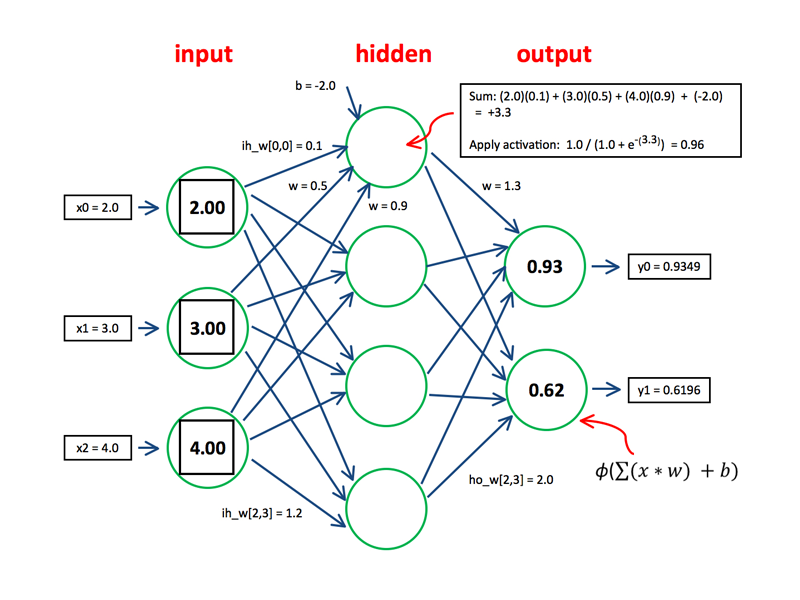

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
def run_MLP(X_train, y_train, input_dim, dropout, epochs, batch_size):
    print('-----------Running Multilayer Perceptron-----------')
    # Build model 
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    # Choose optimizer and loss function
    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
    loss = 'binary_crossentropy'
    # Compile 
    model.compile(optimizer=opt, 
        loss=loss,
        metrics=['accuracy'])
    # Fit on training data and cross-validate
    model.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size)
    return model

In [ ]:
model = run_MLP(X_train, y_train, 5, 0.1, 70, 128)
score = model.evaluate(X_valid, y_valid, batch_size=128)

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

Once you have explored a different classifiers and decided on one trained model (or a voting classifer ensemble as seen before), let us use it to make predictions using the features from `X_test` and save the results into `y_test`.

In [ ]:
y_test = model.predict(X_test)
y_test = [1 if i >= 0.5 else 0 for i in y_test]
y_test = pd.Series((i for i in y_test))
y_test

We create a dataframe for submission using the predictions from `y_test` and save it to a csv file. It is important that our submission file is in correct format to be graded without errors.

In [ ]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_test})
submission.to_csv('submission.csv', index=False)